# General introduction
This notebook presents illustrations of using a Scikit-learn package (sklearn.neighbors) to search k nearest neighbors and applications in data classification and interpolation.
Exercises present for the three datasets:
1. Wine data (https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data)
2. Sines time series
3. Surface ocean *p*H over part of the Southest Asia (DOI:10.48670/moi-00047) 

Slides for further explanations can be found ([**here**](https://drive.google.com/file/d/1mIYysQG-HU83bibkgm3cfqXF9wRKE3Pf/view?usp=sharing))


In [1]:
### IMPORT PACKAGES
import warnings
warnings.filterwarnings("ignore")
import sys
import pandas as pd
import numpy as np
import math
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt 
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import ListedColormap
import seaborn as sns
import glob
from netCDF4 import Dataset, num2date, date2num, num2date
#import routines
from generate_data import generate_data
from tqdm import tqdm
from sklearn.neighbors import NearestNeighbors, KNeighborsRegressor, KNeighborsClassifier
import sklearn.datasets as sklDATA 
import time

# Classification

In [2]:
wine     =  sklDATA.load_wine()
data_all = pd.DataFrame(data=np.c_[wine['data'],wine['target']], columns=wine['feature_names']+['target'])
data_all['target'] +=1
#Check data with info function
data_all.head()



,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,1.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,1.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,1.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,1.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,1.0


In [3]:
data=data_all[['alcohol','color_intensity', 'target']]
data=data.iloc[np.where(data['target']<3)]


In [4]:
data.head()

,alcohol,color_intensity,target
0,14.23,5.64,1.0
1,13.20,4.38,1.0
2,13.16,5.68,1.0
3,14.37,7.80,1.0
4,13.24,4.32,1.0


In [5]:
data.tail()

,alcohol,color_intensity,target
125,12.07,2.76,2.0
126,12.43,3.94,2.0
127,11.79,3.00,2.0
128,12.37,2.12,2.0
129,12.04,2.60,2.0


## Classification with subsample (T=10)

In [6]:
## STEP 1: Consider a training set
X = data.iloc[:,:2] #INPUT for wine properties (alcohol, color intensity)
y = data.target #INPUT for wine class (1, 2)
Xy0  = np.array([12.8,5.54]).reshape(1,2) #TARGET point

In [7]:
# X.shape, y.shape, X0.shape

In [8]:
## STEP 2: Compute distances from the TARGET X0 to X
jj=1
dist = []
for i in np.append(np.arange(5,dtype=int), np.arange(125,130,dtype=int)):
    d = np.linalg.norm(Xy0[0,:] - X.iloc[i,:]) #Euclidean distance (l2-norm)
    dist = np.append(dist,d)
    print('distance '+str(jj)+': ', d.round(2))
    jj+=1

distance 1:  1.43
distance 2:  1.23
distance 3:  0.39
distance 4:  2.75
distance 5:  1.3
distance 6:  2.87
distance 7:  1.64
distance 8:  2.73
distance 9:  3.45
distance 10:  3.04


In [9]:
k=5
## STEP 3: Sort distances from the TARGET Xy0 to Xy, and take k points in Xy with smallest distances from Xy0
print('indices with sorted distance: ', np.argsort(dist)+1)
print('{} nearest neighbors of {}: '.format(k, Xy0.squeeze()),\
      ['Xy'+str(np.argsort(dist)[i]+1) for i in range(k)])

indices with sorted distance:  [ 3  2  5  1  7  8  4  6 10  9]
5 nearest neighbors of [12.8   5.54]:  ['Xy3', 'Xy2', 'Xy5', 'Xy1', 'Xy7']


## Classification with large sample (T=130)

In [10]:
X = data.iloc[:,:2]
y = data.target
Xy0  = np.array([12.8,5.54]).reshape(1,2)

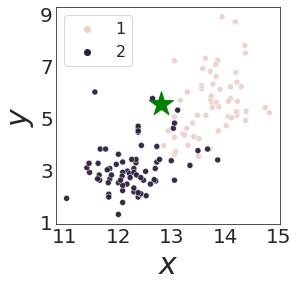

In [11]:
zoom = 2
colors = ['orange', 'k']
FS = 15*zoom;FS1 = 10*zoom; LW1= 2*zoom;LW2= 1.5*zoom; LP = 0.001*zoom; MS = 8*zoom
ilim = 220
sns.set_style("white")
plt.rcParams['figure.figsize'] = (2*zoom, 2*zoom)
plt.rcParams['xtick.major.pad']='0'
plt.rcParams['ytick.major.pad']='0'
plt.rc('xtick', labelsize= 6*zoom) 
plt.rc('ytick', labelsize= 6*zoom)
plt.figure()
sns.scatterplot(data['alcohol'],data['color_intensity'] ,hue=data['target'].astype(int), alpha=0.95)
plt.scatter(Xy0[:,0],Xy0[:,1] ,marker='*', color='g', s=MS*40, alpha=1)
plt.xlabel('$x$', fontsize=FS)
plt.ylabel('$y$', fontsize=FS)
# plt.xticks(np.arange(11,15,1), '')
# plt.yticks(np.arange(1,10,3), '')
plt.xticks(np.arange(11,16,1),fontsize=FS1)
plt.yticks(np.arange(1,10,2),fontsize=FS1)
plt.legend(frameon=True, ncol=1,fontsize=8*zoom)
plt.show()


In [12]:
X = data.iloc[:,:2]
y = data.target
Xy0  = np.array([12.8,5.54]).reshape(1,2)

In [13]:
k=5
weights=  'uniform'
clf = KNeighborsClassifier(k, weights=weights)
clf.fit(X, y)
class_assigned = clf.predict(Xy0)
print('class', int(class_assigned[0]))

class 1


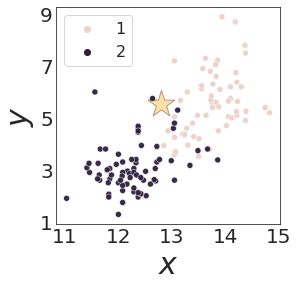

In [14]:
zoom = 2
colors = ['orange', 'k']
FS = 15*zoom; LW1= 2*zoom;LW2= 1.5*zoom; LP = 0.001*zoom; MS = 8*zoom
ilim = 220
sns.set_style("white")
plt.rcParams['figure.figsize'] = (2*zoom, 2*zoom)
plt.rcParams['xtick.major.pad']='0'
plt.rcParams['ytick.major.pad']='0'
plt.rc('xtick', labelsize= 6*zoom) 
plt.rc('ytick', labelsize= 6*zoom)
plt.figure()
sns.scatterplot(data['alcohol'],data['color_intensity'] ,hue=data['target'].astype(int), alpha=0.95)
plt.scatter(Xy0[:,0],Xy0[:,1] ,marker='*', s=MS*50,c=colors[int(class_assigned[0])-1], alpha=0.35, edgecolors='k')
plt.xlabel('$x$', fontsize=FS)
plt.ylabel('$y$', fontsize=FS)
# plt.xticks(np.arange(11,15,1), '')
# plt.yticks(np.arange(1,10,3), '')
plt.xticks(np.arange(11,16,1),fontsize=FS1)
plt.yticks(np.arange(1,10,2),fontsize=FS1)
plt.legend(frameon=True, ncol=1,fontsize=8*zoom)
plt.show()


# Sinus data generation

In [15]:
# parameters
T=1000; num_seed =1
dx = 1 # dimension of the state
dt_int = 1 # fixed integration time
dt_model = 1 # chosen number of model time step, the larger dt_model the more nonliner model
var_obs = np.array([0]) # indices of the observed variables
dy = len(var_obs) # dimension of the observations

a = 3;
mx = lambda x: np.sin(a*x) # fortran version (fast)
jac_mx = lambda x: a*np.cos(a*x) # python version (slow)
H = np.eye(dx)
h = lambda x: H.dot(x)  # observation model
# Setting covariances

sig2_Q = 0.2; sig2_R = 0.1 # fixed parameters
Q_true = np.eye(dx) *sig2_Q #  model variance
R_true = np.eye(dx) *sig2_R # observation variance
# prior state
x0 = np.ones(1)

# generate data
T_burnin = T
T_train = T# length of the training
T_test = int(T*2) # length of the testing data

# prior state
x0 = np.ones(1)


# num_seed = 1

X_train, _, X_test, _, _ = generate_data(x0,mx,h,Q_true,R_true,dt_int,dt_model,var_obs, T_burnin, T_train, T_test, num_seed) 
X_train.time = np.arange(0,T_train)
X_test.time = np.arange(0,T_test)
X_train0, Y_train0, _, _, _ = generate_data(X_train.values[:,0],mx,h,Q_true,R_true,dt_int,dt_model,var_obs, T_burnin, T_train, T_test, num_seed) 
X_train0.time = np.arange(0,T_train)


missing_data = False

In [16]:
#%% FORECASTING
X0 = X_test.values[:,:-1]
Y0 = X_test.values[:,1:]
X = X_train.values[:,:-1]
Y = X_train.values[:,1:]
Z = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
Z0 = np.append(X0, Y0, axis=0).T
Z = np.append(X, Y, axis=0).T

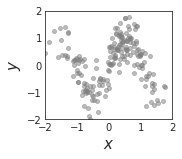

In [17]:
FS = 15;FS1= 10;LW1= 2;LW2= 1.5; LP = 0.001; MS = 8
ilim = 220
sns.set_style("white")
plt.rcParams['figure.figsize'] = (5, 2)
plt.rcParams['xtick.major.pad']='0'
plt.rcParams['ytick.major.pad']='0'
plt.rc('xtick', labelsize= 6) 
plt.rc('ytick', labelsize= 6)
plt.figure(2)
plt.subplot(121)
plt.plot(X[:,:200],Y[:,:200], '.', c='grey', alpha=0.5,markersize= MS)
plt.xlabel('$x$', fontsize=FS)
plt.ylabel('$y$', fontsize=FS)
plt.xticks(np.arange(-2,3,1),fontsize=FS1)
plt.yticks(np.arange(-2,3,1),fontsize=FS1)
# plt.grid()
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.show()

# k-NN Regression

In [18]:
X0 = X_test.values[:,:-1]
Y0 = X_test.values[:,1:]
X = X_train.values[:,:-1]
Y = X_train.values[:,1:]
Z = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
Z0 = np.append(X0, Y0, axis=0).T
Z = np.append(X, Y, axis=0).T
X.shape, Y.shape, np.arange(-2,2,).shape

((1, 999), (1, 999), (4,))

In [19]:
# np.append(X[0,:10].reshape(10,1), Y[0,:10].reshape(10,1), axis=1).round(4)

In [20]:
k=50
a,b = -1.75, 1.75
X00 = np.arange(a,b,(b-a)/100).reshape(1,100)
weights = 'uniform' #"uniform", "distance"
knn_regresion = KNeighborsRegressor(k, weights=weights)
Y0reg = knn_regresion.fit(X.T, Y.T).predict(X00.T)


In [21]:
X00.shape

(1, 100)

In [22]:
knn_regresion.fit(X.T, Y.T).predict(np.array( [-1]).reshape(1,1))

array([[-0.05978742]])

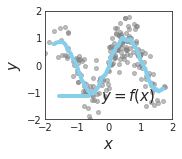

In [23]:
FS = 15; LW1= 2;LW2= 4; LP = 0.001; MS = 8
ilim = 220
sns.set_style("white")
plt.rcParams['figure.figsize'] = (5, 2)
plt.rcParams['xtick.major.pad']='0'
plt.rcParams['ytick.major.pad']='0'
plt.rc('xtick', labelsize= 6) 
plt.rc('ytick', labelsize= 6)
plt.figure(2)
plt.subplot(121)
plt.plot(X[:,:200],Y[:,:200], '.', c='grey', alpha=0.5,markersize= MS)
# plt.plot(state.T,mean_xft.T[ind_sort],linewidth = LW1,c='r',label= '$m$')
plt.plot(X00.T.ravel(),Y0reg.ravel(),linewidth = LW2,c='skyblue', label = '$y = f(x)$')
# plt.legend( fontsize = FS, ncol =2,frameon=False,loc ='best')
plt.legend(frameon=False, ncol=1, fontsize=FS)
plt.xlabel('$x$', fontsize=FS)
plt.ylabel('$y$', fontsize=FS)
plt.xticks(np.arange(-2,3,1),fontsize=FS1)
plt.yticks(np.arange(-2,3,1),fontsize=FS1)
# plt.grid()
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.show()

# Real data (CMEMS pH)
Data access and citation: Chau T T T, Gehlen M, Chevallier F (2022). Global Ocean Surface Carbon: MULTIOBS_GLO_BIO_CARBON_SURFACE_REP_015_008, E.U. Copernicus Marine Service Information, DOI:10.48670/moi-00047.

In [24]:
class MidpointNormalizeFair(mpl.colors.Normalize):
    """ From: https://matplotlib.org/users/colormapnorms.html"""
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        mpl.colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...

        result, is_scalar = self.process_value(value)
        self.autoscale_None(result)

        vlargest = max( abs( self.vmax - self.midpoint ), abs( self.vmin - self.midpoint ) )
        x, y = [ self.midpoint - vlargest, self.midpoint, self.midpoint + vlargest], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

## Load pH data

In [25]:
year_release = 2022
year_beg = 1985
year_end = year_release-1

str_resol_rep = '100' # '100' or '025' resolution 
if str_resol_rep == '100': # '100' or '025' resolution 
    str_resol_rep_rev = '025'
    inc = 1
if str_resol_rep == '025': # '100' or '025' resolution 
    str_resol_rep_rev = '100'
    inc=4
num_sample = 100
num_data = (year_end-year_beg+1)*12
months = (np.arange(num_data,dtype=int) % 12) +1 #list values of month with respect to data
years = year_beg + (np.arange(num_data)//12)
num_years = year_end-year_beg +1
  
months_list = np.tile(np.array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']), num_years)
years_list=[]                     
for t in range(num_data):
    years_list=np.append(years_list, str(years[t]))  
    
#True data over the Southeast Asia Sea
direct_pH      = 'pH_Southeast-Asia_'+str(year_beg)+'to'+str(year_end)+'.nc'

pH_reconstr                       = Dataset(direct_pH)['pH'][:].squeeze()
pH_reconstr[pH_reconstr.mask]   = np.nan
lat, lon =   Dataset(direct_pH)['lat'][:],Dataset(direct_pH)['lon'][:]
time_SOCAT = Dataset(direct_pH)['time'][:].squeeze()


DATplt = pH_reconstr

#set missing data
xi, yi = np.meshgrid(lon, lat)
T  = len(DATplt.ravel())
Tmiss = int(T*0.2) # generate 20% of reference data as missing data
ind_obs  = np.setdiff1d(np.arange(len(DATplt.ravel())), np.random.choice(len(DATplt.ravel()), Tmiss))
# ind_miss =  np.random.choice(len(DATplt.ravel()), Tmiss)
DATmiss  = np.nan*np.zeros(DATplt.shape)
DATmiss[np.unravel_index(ind_obs, DATplt.shape)] = DATplt[np.unravel_index(ind_obs, DATplt.shape)]

In [26]:
ind_obs = np.where(~np.isnan(np.sum(DATplt,0)))


In [27]:
idrd = np.random.choice(len(ind_obs[0]))
trd = np.random.choice(len(DATplt))
xi[ind_obs][idrd], yi[ind_obs][idrd], DATplt[trd,...][ind_obs][idrd]

(114.5, 5.5, 8.045646)

In [28]:
Period = '2020-2020'#'1985-2021'
mo = 5
beg =int(Period[:4]); end = int(Period[-4:])
ind_time = np.arange(num_years*12, dtype =  int)[(beg - year_beg)*12+mo:(end - year_beg)*12+mo+1]
ind_obs = np.where(~np.isnan(DATmiss[ind_time,...].squeeze()))
ind_unobs = np.where(~np.isnan(DATplt[ind_time,...].squeeze()) & np.isnan(DATmiss[ind_time,...].squeeze()) )

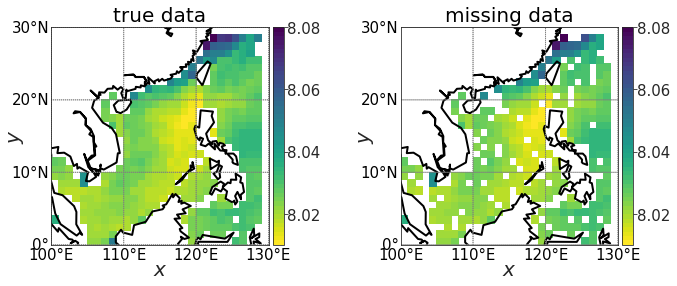

In [29]:
lon_SOCAT_origin = lon.copy()
lon_SOCAT_origin[np.where(lon_SOCAT_origin>180)] = lon_SOCAT_origin[np.where(lon_SOCAT_origin>180)]-360
lon_SOCAT = np.sort(lon_SOCAT_origin); ind_sort_plot = np.argsort(lon_SOCAT_origin)
lat_SOCAT =  lat.copy()

FS = 20; FS1=15; LW= 1; MS = 0.0001; LP = -0.010; nb_colors = 50
mycmap = mpl.cm.get_cmap('viridis_r',nb_colors)
dx, dy = 1/inc,1/inc
sns.set_style("white")
# plt.rcParams['figure.figsize'] = (6,4)
plt.rcParams['xtick.major.pad']='0'
plt.rcParams['ytick.major.pad']='0'
plt.rc('xtick', labelsize= FS1) 
plt.rc('ytick', labelsize= FS1)
fig=plt.figure(figsize=(24,4))
plt.subplot(141)
map = Basemap(llcrnrlon=100.,llcrnrlat=0,urcrnrlon=130.,urcrnrlat=30)
map.drawparallels(np.arange(0,40,10),labels='',linewidth = LW, fontsize=FS1,color ='grey')
map.drawmeridians(np.arange(100,140,10),labels='',linewidth = LW,fontsize=FS1,color ='grey')
map.drawparallels(np.arange(0,40,10),labels=[1,0,0,0],linewidth = LW, fontsize=FS1,color ='grey')
map.drawmeridians(np.arange(100,140,10),labels=[0,0,0,1],linewidth = LW,fontsize=FS1,color ='grey')
map.drawcoastlines(linewidth = 2*LW,color ='k')
xi, yi = np.meshgrid(lon_SOCAT, lat_SOCAT)
Z= np.mean(DATplt[ind_time,...],axis=0)[:,ind_sort_plot]
Zmin, Zmax = 8.01, 8.08 #np.nanmin(Z), np.nanmax(Z)
#Z[mask_MARCATS[:,ind_sort_plot]==1] = np.nan
p = map.pcolor(xi-dx/2, yi-dy/2, Z, cmap= mycmap, vmin=Zmin, vmax=Zmax)
# levels = MaxNLocator(nbins=nb_colors).tick_values(Zmin, Zmax)
# p = map.contourf(xi - dx/2.,yi - dy/2., Z, levels=levels, cmap=mycmap, vmin=Zmin, vmax=Zmax, extend= 'both')
cbar=map.colorbar(p, shrink=0.5,  spacing='proportional')#, extend= 'both')
cbar.ax.tick_params(labelsize=FS1) 
plt.title(r'true data',color='k', fontsize=FS)
#cbar.set_label(r'spco2  [$\mu$atm]', labelpad=0.5,fontsize=FS)
# plt.ylim([-90,90])
plt.xlabel('$x$', fontsize=FS, labelpad=15)
plt.ylabel('$y$', fontsize=FS, labelpad=25)
plt.grid()


plt.subplot(142)
map = Basemap(llcrnrlon=100.,llcrnrlat=0,urcrnrlon=130.,urcrnrlat=30)
map.drawparallels(np.arange(0,40,10),labels='',linewidth = LW, fontsize=FS1,color ='grey')
map.drawmeridians(np.arange(100,140,10),labels='',linewidth = LW,fontsize=FS1,color ='grey')
map.drawparallels(np.arange(0,40,10),labels=[1,0,0,0],linewidth = LW, fontsize=FS1,color ='grey')
map.drawmeridians(np.arange(100,140,10),labels=[0,0,0,1],linewidth = LW,fontsize=FS1,color ='grey')
map.drawcoastlines(linewidth = 2*LW,color ='k')
xi, yi = np.meshgrid(lon_SOCAT, lat_SOCAT)
Z= np.mean(DATmiss[ind_time,...],axis=0)[:,ind_sort_plot]
Zmin, Zmax = 8.01, 8.08 #np.nanmin(Z), np.nanmax(Z)
p = map.pcolor(xi-dx/2, yi-dy/2, Z, cmap= mycmap, vmin=Zmin, vmax=Zmax)
cbar=map.colorbar(p, shrink=0.5,  spacing='proportional')#, extend= 'both')
cbar.ax.tick_params(labelsize=FS1) 
plt.title(r'missing data',color='k', fontsize=FS)
plt.xlabel('$x$', fontsize=FS, labelpad=15)
plt.ylabel('$y$', fontsize=FS, labelpad=25)
plt.grid()
plt.show()

In [30]:
## SET TRAINING DATA +TARGET POINTS

In [31]:
X=np.column_stack((xi[ind_obs], yi[ind_obs])) # Longitude, Latitude at available data
Y=DATplt[ind_time,...].squeeze()[ind_obs].reshape(len(X),1) # pH values 
X00 = np.column_stack((xi[ind_unobs], yi[ind_unobs])) # Longitude, Latitude at missing data
X.shape, Y.shape, X00.shape

((380, 2), (380, 1), (86, 2))

In [32]:
print('1. Training data:')
print(' a. (Lon, Lat)')
print(X[:5,:])
print(' b. pH values')
print(Y[:5,:])
print('             ')
print('2. Target data:')
print(' a. (Lon, Lat)')
print(X00[:5,:])

1. Training data:
 a. (Lon, Lat)
[[105.5   0.5]
 [106.5   0.5]
 [107.5   0.5]
 [119.5   0.5]
 [125.5   0.5]]
 b. pH values
[[8.021516]
 [8.02211 ]
 [8.024746]
 [8.022524]
 [8.031773]]
             
2. Target data:
 a. (Lon, Lat)
[[108.5   0.5]
 [122.5   1.5]
 [105.5   2.5]
 [107.5   2.5]
 [109.5   2.5]]


In [33]:
nbround = 2
start=time.time()
k=10#k nearest neighbors
weights = 'uniform' #"uniform", "distance"
knn_regresion = KNeighborsRegressor(k, weights=weights)
timecon = time.time() - start
str_time = str(timecon)#str(round(timecon, nbround)) 
Y0reg = knn_regresion.fit(X, Y).predict(X00)
print('Interpolated data (pH):')
print(Y0reg[:5,:])
       
# while (len(str_time) < nbround+4):
#     for istrsc in range(len(str_time), nbround+4):
#         str_time += '0'




Interpolated data (pH):
[[8.02128 ]
 [8.026762]
 [8.020488]
 [8.021149]
 [8.021311]]


In [34]:
DATpred=DATmiss[ind_time,...].squeeze().copy()
DATpred[ind_unobs]=Y0reg [0]
print('k value: ', k)
print('error (TRUE - INTERPOLATION) = ', np.sqrt(np.mean((DATplt[ind_time,...].squeeze()[ind_unobs]-Y0reg [0])**2)))
print('Total time: ' + str_time + ' seconds')

k value:  10
error (TRUE - INTERPOLATION) =  0.013976099
Total time: 9.846687316894531e-05 seconds


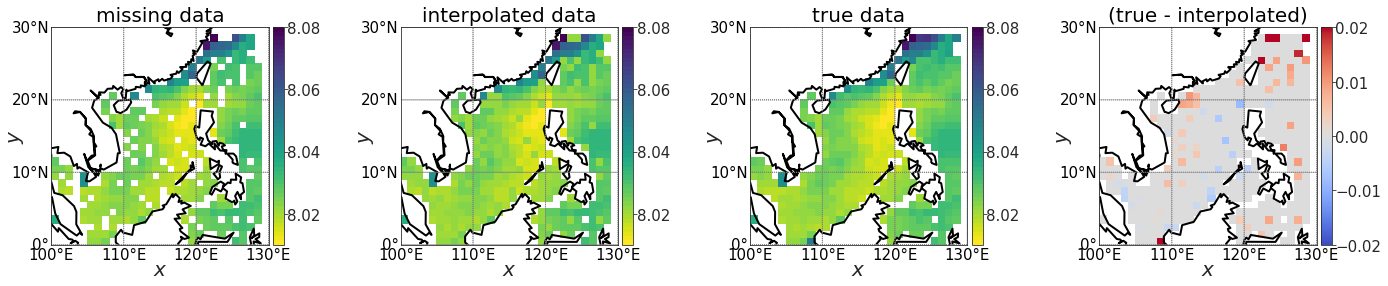

In [35]:
lon_SOCAT_origin = lon.copy()
lon_SOCAT_origin[np.where(lon_SOCAT_origin>180)] = lon_SOCAT_origin[np.where(lon_SOCAT_origin>180)]-360
lon_SOCAT = np.sort(lon_SOCAT_origin); ind_sort_plot = np.argsort(lon_SOCAT_origin)
lat_SOCAT =  lat.copy()

FS = 20; FS1=15; LW= 1; MS = 0.0001; LP = -0.010; nb_colors = 50
mycmap = mpl.cm.get_cmap('viridis_r',nb_colors)
dx, dy = 1/inc,1/inc
sns.set_style("white")
# plt.rcParams['figure.figsize'] = (6,4)
plt.rcParams['xtick.major.pad']='0'
plt.rcParams['ytick.major.pad']='0'
plt.rc('xtick', labelsize= FS1) 
plt.rc('ytick', labelsize= FS1)
fig=plt.figure(figsize=(24,4))
plt.subplot(141)
map = Basemap(llcrnrlon=100.,llcrnrlat=0,urcrnrlon=130.,urcrnrlat=30)
map.drawparallels(np.arange(0,40,10),labels='',linewidth = LW, fontsize=FS1,color ='grey')
map.drawmeridians(np.arange(100,140,10),labels='',linewidth = LW,fontsize=FS1,color ='grey')
map.drawparallels(np.arange(0,40,10),labels=[1,0,0,0],linewidth = LW, fontsize=FS1,color ='grey')
map.drawmeridians(np.arange(100,140,10),labels=[0,0,0,1],linewidth = LW,fontsize=FS1,color ='grey')
map.drawcoastlines(linewidth = 2*LW,color ='k')
xi, yi = np.meshgrid(lon_SOCAT, lat_SOCAT)
Z= np.mean(DATmiss[ind_time,...],axis=0)[:,ind_sort_plot]
Zmin, Zmax = 8.01, 8.08 #np.nanmin(Z), np.nanmax(Z)
p = map.pcolor(xi-dx/2, yi-dy/2, Z, cmap= mycmap, vmin=Zmin, vmax=Zmax)
cbar=map.colorbar(p, shrink=0.5,  spacing='proportional')#, extend= 'both')
cbar.ax.tick_params(labelsize=FS1) 
plt.title(r'missing data',color='k', fontsize=FS)
plt.xlabel('$x$', fontsize=FS, labelpad=15)
plt.ylabel('$y$', fontsize=FS, labelpad=25)
plt.grid()

plt.subplot(142)
map = Basemap(llcrnrlon=100.,llcrnrlat=0,urcrnrlon=130.,urcrnrlat=30)
map.drawparallels(np.arange(0,40,10),labels='',linewidth = LW, fontsize=FS1,color ='grey')
map.drawmeridians(np.arange(100,140,10),labels='',linewidth = LW,fontsize=FS1,color ='grey')
map.drawparallels(np.arange(0,40,10),labels=[1,0,0,0],linewidth = LW, fontsize=FS1,color ='grey')
map.drawmeridians(np.arange(100,140,10),labels=[0,0,0,1],linewidth = LW,fontsize=FS1,color ='grey')
map.drawcoastlines(linewidth = 2*LW,color ='k')
xi, yi = np.meshgrid(lon_SOCAT, lat_SOCAT)
Z= DATpred[:,ind_sort_plot]
Zmin, Zmax = 8.01, 8.08 #np.nanmin(Z), np.nanmax(Z)
p = map.pcolor(xi-dx/2, yi-dy/2, Z, cmap= mycmap, vmin=Zmin, vmax=Zmax)
cbar=map.colorbar(p, shrink=0.5,  spacing='proportional')#, extend= 'both')
cbar.ax.tick_params(labelsize=FS1) 
plt.title(r'interpolated data',color='k', fontsize=FS)
plt.xlabel('$x$', fontsize=FS, labelpad=15)
plt.ylabel('$y$', fontsize=FS, labelpad=25)
plt.grid()
 
plt.subplot(143)
map = Basemap(llcrnrlon=100.,llcrnrlat=0,urcrnrlon=130.,urcrnrlat=30)
map.drawparallels(np.arange(0,40,10),labels='',linewidth = LW, fontsize=FS1,color ='grey')
map.drawmeridians(np.arange(100,140,10),labels='',linewidth = LW,fontsize=FS1,color ='grey')
map.drawparallels(np.arange(0,40,10),labels=[1,0,0,0],linewidth = LW, fontsize=FS1,color ='grey')
map.drawmeridians(np.arange(100,140,10),labels=[0,0,0,1],linewidth = LW,fontsize=FS1,color ='grey')
map.drawcoastlines(linewidth = 2*LW,color ='k')
xi, yi = np.meshgrid(lon_SOCAT, lat_SOCAT)
Z= np.mean(DATplt[ind_time,...],axis=0)[:,ind_sort_plot]
Zmin, Zmax = 8.01, 8.08 #np.nanmin(Z), np.nanmax(Z)
#Z[mask_MARCATS[:,ind_sort_plot]==1] = np.nan
p = map.pcolor(xi-dx/2, yi-dy/2, Z, cmap= mycmap, vmin=Zmin, vmax=Zmax)
# levels = MaxNLocator(nbins=nb_colors).tick_values(Zmin, Zmax)
# p = map.contourf(xi - dx/2.,yi - dy/2., Z, levels=levels, cmap=mycmap, vmin=Zmin, vmax=Zmax, extend= 'both')
cbar=map.colorbar(p, shrink=0.5,  spacing='proportional')#, extend= 'both')
cbar.ax.tick_params(labelsize=FS1) 
plt.title(r'true data',color='k', fontsize=FS)
#cbar.set_label(r'spco2  [$\mu$atm]', labelpad=0.5,fontsize=FS)
# plt.ylim([-90,90])
plt.xlabel('$x$', fontsize=FS, labelpad=15)
plt.ylabel('$y$', fontsize=FS, labelpad=25)
plt.grid()



plt.subplot(144)
map = Basemap(llcrnrlon=100.,llcrnrlat=0,urcrnrlon=130.,urcrnrlat=30)
map.drawparallels(np.arange(0,40,10),labels='',linewidth = LW, fontsize=FS1,color ='grey')
map.drawmeridians(np.arange(100,140,10),labels='',linewidth = LW,fontsize=FS1,color ='grey')
map.drawparallels(np.arange(0,40,10),labels=[1,0,0,0],linewidth = LW, fontsize=FS1,color ='grey')
map.drawmeridians(np.arange(100,140,10),labels=[0,0,0,1],linewidth = LW,fontsize=FS1,color ='grey')
map.drawcoastlines(linewidth = 2*LW,color ='k')
xi, yi = np.meshgrid(lon_SOCAT, lat_SOCAT)
Z= (np.mean(DATplt[ind_time,...],axis=0) -DATpred )[:,ind_sort_plot]
Zmin, Zmax = -0.02, 0.02#np.nanmin(Z), np.nanmax(Z)
#Z[mask_MARCATS[:,ind_sort_plot]==1] = np.nan
p = map.pcolor(xi-dx/2, yi-dy/2, Z, cmap= 'coolwarm', vmin=Zmin, vmax=Zmax)
# levels = MaxNLocator(nbins=nb_colors).tick_values(Zmin, Zmax)
# p = map.contourf(xi - dx/2.,yi - dy/2., Z, levels=levels, cmap=mycmap, vmin=Zmin, vmax=Zmax, extend= 'both')
cbar=map.colorbar(p, shrink=0.5,  spacing='proportional')#, extend= 'both')
cbar.ax.tick_params(labelsize=FS1) 
plt.title(r'(true - interpolated)',color='k', fontsize=FS)
#cbar.set_label(r'spco2  [$\mu$atm]', labelpad=0.5,fontsize=FS)
# plt.ylim([-90,90])
plt.xlabel('$x$', fontsize=FS, labelpad=15)
plt.ylabel('$y$', fontsize=FS, labelpad=25)
plt.grid()
plt.show()